<a href="https://colab.research.google.com/github/raqueeb/TensorFlow2/blob/master/gradient_tape_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## একদম স্ক্র্যাচ থেকে টেন্সরফ্লো ২.x মডেল

*অনেক থিওরি পড়লাম, এবার কিছুটা হাতেকলমে দেখি। কিছুটা ইন্টারমিডিয়েট লেভেলের ব্যবহারকারীদের জন্য। তবে এই চ্যাপ্টারটা না পড়লে ব্যবহারিকভাবে খুব একটা সমস্যা হবে না। এর পরের চ্যাপ্টারটাই "কনভল্যুশনাল নিউরাল নেটওয়ার্ক"। সমস্যা মনে হলে বাদ দিতে পারেন।* 

কেমন হয়, আমরা একটা ছোট উদাহরন দেখি টেন্সরফ্লো ২.x এ - একদম স্ক্র্যাচ থেকে। মানে বিল্ট-ইন লেয়ার, অপ্টিমাইজার, অথবা লস ফাংশন ছাড়া?

---
*নিউরাল নেটওয়ার্ক নিয়ে কাজ করতে গিয়ে অ্যান্ড্রু ট্রাস্কএর (১) ১১ লাইনের পাইথন কোড দিয়ে নিউরাল নেটওয়ার্ক এবং (২) ১৩ লাইনের পাইথন কোড দিয়ে ‘গ্রেডিয়েন্ট ডিসেন্ট’ দুটো অসাধারণ রিসোর্স। বইয়ের শেষে লিংকগুলো দেখতে পারেন। *

---




আপনি হয়তোবা বলতে পারেন আমি কেন বারবার ‘লিনিয়ার রিগ্রেশন’ এ ফিরে আসছি। আসলে মেশিন লার্নিং অথবা ডিপ লার্নিং এর ‘কোর’ ব্যাপারটা ঘুরে আসছে ‘গ্রেডিয়েন্ট ডিসেন্ট’ দিয়ে। সেই ‘গ্র্যাডিয়েন্ট ডিসেন্ট’ বুঝতে ‘লিনিয়ার রিগ্রেশন’ বেশ ভালো মডেল। সব ডিপ নিউরাল নেটওয়ার্ক এর ট্রেনিং চলে গ্রেডিয়েন্ট ডিসেন্ট দিয়ে। আমরা নিচের ছবি দুটো দেখি। এই একই প্যাটার্ন কাজ করে ডিপ নিউরাল নেটওয়ার্কে। সুতরাং এই ব্যাপারটাতে আমাদের সময় দেয়া উচিত। ধন্যবাদ জস গর্ডনকে। তার নোটবুক দিয়ে।

আমরা আগেও বলেছি, আমাদের লিনিয়ার রিগ্রেশন অথবা ডিপ নিউরাল নেটওয়ার্কে তিনটা জিনিস প্রয়োজন। প্রথম জিনিস হচ্ছে মডেল যা আমাদের জিনিসপত্রকে প্রেডিকশন এর জন্য ফাংশন হিসেবে কাজ করে। এর আগেও দেখেছিলাম সরলরেখার একটা ইকুয়েশন, y=mx + b, যার মাধ্যমে আমরা ডাটা থেকে একটা ‘বেস্ট ফিট লাইন’ বের করার চেষ্টা করছি। আমাদের আগের বইটাতে দেখিয়েছিলাম, এখানে দুটো প্যারামিটার অর্থাৎ ভ্যারিয়েবলগুলোকে সেট করতে হবে শুরুতে। বাকিদুটোরমধ্যে, আমাদের এখানে m মানে হচ্ছে শ্লোপ, আবার b মানে হচ্ছে কোথায় লাইনটা ‘ইন্টারসেপ্ট’ বা ‘ক্রস’ করবে। আমাদের এই ভেরিয়েবলগুলোর ডাটাকে পাল্টালে একসময় না একসময় সেটা আমাদের লাইনকে ফিট করতে পারে।

আমাদের ছবিতে ডানে ওই ডাটার একটা স্ক্যাটার প্লট দেখছি। অনেকগুলো ডাটা পয়েন্ট থেকে তৈরি করা হয়েছে এই স্ক্যাটার প্লট। এবং এর উপর দিয়ে গিয়েছে বেস্ট ফিট লাইন। এখন আমাদের কাছে একটা মডেল আছে যেটাকে আমরা বলছি লাইন - যাকে আমরা এদিক ওদিক করতে পারি, সেখানে প্রশ্ন হতে পারে আমরা কিভাবে ডাটা দিয়ে লাইনটাকে ফিট করাতে পারি? একটা উপায় হতে পারে - যেভাবে লাইন সেই ডাটাকে ফিট করতে পারে সেটাকে আমরা বলছি ‘স্কোয়ারড এরর’। 

আমাদের আগের বইতে এটা অংক করে দেখিয়েছিলাম। এর অর্থ হচ্ছে আমরা ওই পাতায় একটা লাইন আঁকবো, এবং এর পাশাপাশি প্রতিটা ডাটা পয়েন্ট থেকে লাইনের সবচেয়ে অল্প দূরত্বটা মাপবো। সেটাকে ‘স্কয়ার’ বা বর্গ করার পর সবগুলোকে যোগ করলেই আমরা সেটার একটা আউটপুট পাব। এই বর্গগুলোর যোগফল যত বড় হবে ততোই আমাদের লাইন - ডাটাকে কম ফিট করতে পারবে। এদিকে আমাদের লাইন যত ভালো করে ডাটাকে ফিট করতে পারবে ততই বর্গগুলোর যোগফল কম হবে। 

এর মানে হচ্ছে আমাদের একটা সংখ্যা যেটাকে আমরা ‘লস’ বলছি সেটাই ডেসক্রাইব করতে পারছে আমাদের লাইনটা কিভাবে ডাটাকে ফিট করছে। ওই যোগফল সংখ্যা। এটা জানলে আমরা বলতে পারবো কিভাবে ‘লস’কে কমিয়ে আনতে হবে। যখনই আমরা বুঝব আমাদের ‘লস’ সবচেয়ে মিনিমাল মানে কম তখনই আমাদের লাইন ডাটাকে ঠিকমতো ফিট করবে, এর মানে আমরা ‘বেস্ট ফিট লাইন’ পেয়ে গেছি। আর আমরা যেভাবে এই লসটাকে কমিয়ে আনব সেটাকেই সবাই বলে ‘গ্রেডিয়েন্ট ডিসেন্ট’। 

শুরুতে - টেন্সরফ্লো ২.x সিলেক্ট করার জন্য এই ম্যাজিক ফ্ল্যাগ ব্যবহার করা হয়েছে। যেহেতু টেন্সরফ্লো একটা পাইথন লাইব্রেরী, সেজন্য এটাকে ইমপোর্ট করে নিয়ে আসি।



In [1]:
try:
  # %tensorflow_version ব্যবহারের জন্য
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf

আমাদের নিচের ছবিতে বায়ের অংশটা হচ্ছে ‘গ্রেডিয়েন্ট ডিসেন্ট’ এর একটা প্লট। আমাদের আগের দুটো ভ্যারিয়েবল m এবং b এর একটা ফাংশন হিসেবে ‘লস’ মানে ‘স্কোয়ারড এরর’ দেখাচ্ছে। কাজের শুরুতে যেহেতু আমরা এই m এবং b এর ইনিশিয়ালাইজ ভ্যালুকে দৈবচয়নের ভিত্তিতে সেট করেছিলাম সে কারণে শুরুতেই আমাদের লস অনেক বেশি। যখন আমাদের লাইনটাকে একটু নাড়াচাড়া করাবো তখন আমাদের লস কমতে শুরু করবে। এখন প্রশ্ন হতে পারে আমরা কোন দিকে এই m এবং b কে নড়াচড়া করব?

<img src="https://github.com/raqueeb/deep_learning_book/raw/master/.gitbook/assets/linear4.PNG"> চিত্রঃ গ্রেডিয়েন্ট ডিসেন্ট এর লস কমছে, ডানে বেস্ট ফিট লাইন প্লটিং

এটার ব্যাপারে আগে আলাপ করা পুকুরের নামার যে ‘ট্যানজেন্ট’ নিয়ে আলাপ না করে আমরা দুই ভাবে করতে পারি। আমরা m বা b এর ভ্যালকে ডানে বামে করলে আমাদের লাইনটাও এদিক ওদিক হবে। সেজন্য শুরুতে আমরা m কে একটু নিচে নামিয়ে সেই অবস্থায় লসকে নতুন করে কম্পিউট করি। সেখানেই আমরা বুঝতে পারবো কোন দিকে গেলে লস কমবে। তখন আমরা সেই ডাইরেকশন এ আমাদের m কে নিয়ে যাব। এই একই জিনিস করবো আমরা b এর ক্ষেত্রে। 

এই পুরো জিনিসটাকে আমরা দেখতে চাইব টেন্সরফ্লো ২.x দিয়ে। ভুলেও আমরা এখানে হাই লেভেল এপিআই কেরাস এর গল্প নিয়ে আসব না। আবার, টেন্সরফ্লোকে ‘নামপাই’ এর মত ব্যবহার করা যায়। যখনই আমরা টেন্সর এর মত কিছু দেখব সেটাকে আমাদের মাথায় রিপ্লেস করে দেব ‘নামপাই’ এনডি অ্যারে দিয়ে। তার মানে হচ্ছে আমরা এখানে ‘কনস্ট্যান্ট’ পেলাম। নিচের কোড ব্লক দেখুন। আমরা যখনই এই কন্সট্যান্টকে প্রিন্ট আউট করবো তখনই সে এটার ‘শেপ’ এবং ‘ডাটা টাইপ’ দেখাবে। সবচেয়ে বড় ব্যাপার হচ্ছে টেন্সরফ্লো লাইব্রেরিতে নামপাই মেথড আছে। তারমানে আমরা সরাসরি টেন্সর থেকে নামপাইতে যেতে পারি। এখানে দেখুন টেন্সরফ্লো এর ‘শেপ’ এবং ‘ডাটা টাইপ’ দেখাচ্ছে।

 

In [3]:
x = tf.constant([[5, 0], [1, 3]])
print(x)

tf.Tensor(
[[5 0]
 [1 3]], shape=(2, 2), dtype=int32)


In [4]:
# অন্যভাবে দেখি
x.numpy()

array([[5, 0],
       [1, 3]], dtype=int32)

আমরা এখানে একটা উদাহরণ দিচ্ছি কিভাবে গ্রেডিয়েন্ট পাওয়া যায় ‘গ্রেডিয়েন্ট-টেপ’ ব্যবহার করে। অনেকে বলতে পারেন ‘গ্রেডিয়েন্ট-টেপ’ কি? টেপ মানে কি? আচ্ছা, রেকর্ড করা যায় কি দিয়ে? টেপ দিয়ে। সেরকমভাবে টেন্সরফ্লো এই গ্রেডিয়েন্টকে কিভাবে কমপিউট এবং হিসেব করছে সেটার সব ট্র্যাক রেকর্ড রাখে ভ্যারিয়েবল ধরে এই ‘গ্রেডিয়েন্ট-টেপ’।

ধরুন আমরা এখানে একটা ‘কনস্ট্যান্ট’ নিয়েছি যা ৩। এবং আমাদের একটা ফাংশন আছে যেটাকে আমরা বলছি x এর স্কোয়ারড মানে বর্গ। আমরা যদি ক্যালকুলাসের নিয়ম ব্যবহার করি তাহলে ৩ এর উপরে বর্গ যেটাকে আমরা বলছি ২ অর্থাৎ আমরা এটাকে ৩ দিয়ে গুণ করছি। আমরা পাচ্ছি সংখ্যা ৬। আপনি যদি কোডটা দেখেন এখানে আমাদের রেজাল্ট আসবে ৬। এভাবে আমরা গ্রেডিয়েন্ট পাচ্ছি ‘গ্রেডিয়েন্ট টেপ’ থেকে। এর অর্থ হচ্ছে আমরা একই জিনিস করতে পারি বিভিন্ন ভ্যারিয়েবল এবং লেয়ার থেকে। একসাথে। 


In [5]:
x = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x * x
print(tape.gradient(y, x).numpy())

6.0


যেমন, এখানে আমাদের দুটো ডেন্স লেয়ার আছে। এখানে ডেন্স লেয়ার কল করছি কিছু ডাটার উপর। সেই একই গ্রেডিয়েন্ট পাচ্ছি আমাদের ‘গ্রেডিয়েন্ট-টেপ’ থেকে।

In [0]:
dense1 = tf.keras.layers.Dense(32)
dense2 = tf.keras.layers.Dense(32)

with tf.GradientTape() as tape:
  result = dense2(dense1(tf.zeros([1, 10])))
  tape.gradient(result, dense1.variables)

এখন আমরা লিনিয়ার রিগ্রেশন একই জিনিস দেখব গ্রেডিয়েন্ট-টেপ ব্যবহার করে। চলে আসি আমাদের শুরুর সরলরেখার ইকুয়েশনে। আমাদের এই কোড হচ্ছে y = mx +b এর জন্য। 

আমরা এর আগেও একটা স্ক্যাটার প্লট তৈরি করেছিলাম, দৈব চয়ন এর ভিত্তিতে ডাটা তৈরি করে। এখানে আমরা একটা বেস্ট ফিট লাইন তৈরি করব। আমাদের ডাটার সাথে কিছু নয়েজ যোগ করে ডাটাটাকে সত্তিকারের ডাটার মত তৈরি করি। এরপর ডাটাটাকে প্লট করি। তাহলে কি পাব দেখুন?

y = m * x + b + নয়েজ

In [0]:
def make_noisy_data(m=0.1, b=0.3, n=100):
  x = tf.random.uniform(shape=(n,))
  noise = tf.random.normal(shape=(len(x),), stddev=0.01)
  y = m * x + b + noise
  return x, y

In [0]:
x_train, y_train = make_noisy_data()

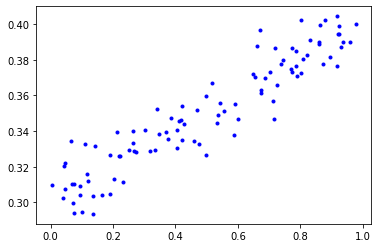

In [9]:
plt.plot(x_train, y_train, 'b.')

এর আগে আমরা টেন্সরফ্লো কনস্ট্যান্ট নিয়ে আলাপ করেছিলাম। কিন্তু এখন আমরা যেটা নিয়ে আলাপ করছি সেটা হচ্ছে টেন্সরফ্লো ভ্যারিয়েবল। এই ভেরিয়েবলগুলোকে এডজাস্ট করবে দরকার মতো।

আমরা এই নিচু লেভেলে কখনোই কোড করবো না (শুধুমাত্র দেখার জন্য ব্যবহার করছি), কারণ আমরা ধরে নিয়েছি এখানে কেরাস ব্যবহার করব না। আমাদের এখানে কোন ফিট মেথড ব্যবহার করছি না। সবকিছুই একদম স্ক্র্যাচ মানে শুরু থেকে করার চেষ্টা করছি। সেজন্যই শুরুতে ভ্যারিয়েবল তৈরি করা। এখানে আমরা ভেরিয়েবলগুলোকে ইনিশিয়ালাইজ করা হয়েছে ০ দিয়ে। আমরা হয়তোবা দৈবচয়নের ভিত্তিতে কিছু সংখ্যা দিতে পারতাম। তবে এটাও কাজ করবে। 

In [0]:
m = tf.Variable(0.)
b = tf.Variable(0.)

শুরুতেই আমরা তৈরি করে নিচ্ছি একটা প্রেডিক্ট ফাংশন। y বের করতে হবে x থেকে। সেখানে আমাদের ইকুয়েশন y = m * x + b,
যেটা সরলরেখার জন্য ব্যবহার করেছিলাম। এখানে আমাদের উদ্দেশ্য কি? আমাদের m এবং b এর জন্য একটা ভালো ভ্যালু খোজা, যাতে ‘বেস্ট ফিট লাইন’ পাওয়া যায়। এটাই আমাদের ‘লস’ ফাংশন। 

In [0]:
def predict(x):
  y = m * x + b
  return y

এখন আসি আরেকটা ফাংশনে squared_error। আমরা যা প্রেডিক্ট করেছিলাম সেটার রেজাল্ট নিচ্ছি প্রথমে। সেটা থেকে বিয়োগ দিচ্ছি সেই রেজাল্টটা যেটা আমরা চেয়েছিলাম। তারপর সেটাকে স্কয়ার বা বর্গ করলাম। সবশেষে সবকিছুর আউটপুটকে গড় করলাম। সেটাই আমাদের ‘স্কোয়ারড এরর’। আমরা যখন নোটবুক দেখব, সেখানে শুরুর ‘স্কোয়ারড এরর’টা দেখতে পাবো। এটাই আমাদের গ্রেডিয়েন্ট ডিসেন্ট একদম শূন্য থেকে মানে স্ক্র্যাচ থেকে। এখানে কেরাস এর কিছুই ব্যবহার করা হয়নি। মডেলের ফিট ফাংশনও নেই এখানে। 

In [0]:
def squared_error(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

ট্রেনিং এর আগে লস ক্যালকুলেট করে নেই।

In [13]:
loss = squared_error(predict(x_train), y_train)
print("Starting loss", loss.numpy())

Starting loss 0.12356364


এখানে গ্র্যাডিয়েন্ট-টেপের মধ্যে x ভ্যালুগুলোকে নিয়ে সেগুলোকে পাঠিয়ে দেওয়া হয়েছে মডেলের ভিতরে যাতে y প্রেডিক্ট করতে পারে। আমরা এখানে ‘স্কোয়ারড এরর’ পাচ্ছি যেটা আসলে একটা সংখ্যা। এখানে আমরা m এবং b এর ‘গ্রাডিয়েন্ট’ পাচ্ছি ‘লস’ এর পরিপ্রেক্ষিতে। আমরা এই জিনিসগুলোকে প্রিন্ট করলে দেখতে পারবো এগুলো আসলে একেকটা সংখ্যা। এখানেই বোঝা যাচ্ছে গ্রেডিয়েন্টের চূড়া কোথায়। এই লাইনটাকে যদি গ্রেডিয়েন্ট এর (ডাইরেকশন) দিকে নড়াই তাহলে আমাদের ‘লস’ বাড়ছে। আবার আমাদের লস কমছে যখন আমরা সেটাকে গ্রেডিয়েন্টের উল্টো দিকে যাচ্ছি। এটাকে বলা হচ্ছে - “গ্রেডিয়েন্ট ডিসেন্ট” মানে নিচে নামছি, লস কমাচ্ছি। 

এটাকে আমরা সবচেয়ে নিচু লেভেলের কোড বলতে পারি। এখানে কোন ‘অপটিমাইজার’ এর ব্যবহার নেই। শুরুতে লার্নিং রেট ধরে নিচ্ছি। আমরা এখানে নেগেটিভ গ্রেডিয়েন্ট এর মান নিয়ে সেটার সাথে লার্নিং রেটকে গুণ দিচ্ছি এবং এর পাশাপাশি m এবং b এর ভ্যালুকে এডজাস্ট করছি। আমরা যখন এই কোড চালাবো তখন টেন্সরফ্লো ট্রেনিং এর মত এর লস কমতে থাকবে। 


In [14]:
learning_rate = 0.05
steps = 200

for i in range(steps):
  
  with tf.GradientTape() as tape:
    predictions = predict(x_train)
    loss = squared_error(predictions, y_train)
    
  gradients = tape.gradient(loss, [m, b])
  
  m.assign_sub(gradients[0] * learning_rate)
  b.assign_sub(gradients[1] * learning_rate)
  
  if i % 20 == 0:    
    print("Step %d, Loss %f" % (i, loss.numpy()))

Step 0, Loss 0.123564
Step 20, Loss 0.000838
Step 40, Loss 0.000238
Step 60, Loss 0.000207
Step 80, Loss 0.000186
Step 100, Loss 0.000169
Step 120, Loss 0.000157
Step 140, Loss 0.000147
Step 160, Loss 0.000140
Step 180, Loss 0.000135


m এবং b এর ভ্যালু দেখি শেখার পরে। সবশেষে আমরা m এবং b এর সর্বশেষ ভ্যালু পাব যাতে ‘বেস্ট ফিট লাইন’ প্লট করা যায়। 


In [15]:
print ("m: %f, b: %f" % (m.numpy(), b.numpy()))


m: 0.109898, b: 0.295677


বেস্ট ফিট লাইন।

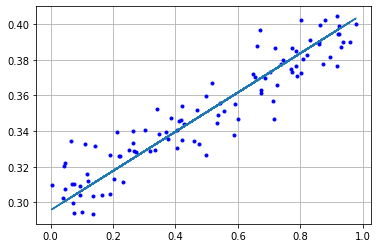

In [16]:
plt.plot(x_train, y_train, 'b.')
plt.plot(x_train, predict(x_train))
plt.grid('off')

এই কোড আসলে আমাদেরকে দেখাচ্ছে কিভাবে ‘গ্র্যাডিয়েন্ট ডিসেন্ট’ তার লস কমাচ্ছে। এই পুরো জিনিসটাই করা হয়েছে টেন্সরফ্লো ২.x দিয়ে। আমাদের নিউরাল নেটওয়ার্ক বা কাস্টম ট্রেনিংয়ে একই জিনিস ব্যবহার করা হয়। 

আমরা নিচের কিছু জিনিস করতে পারি।

গ্রেডিয়েন্ট ডিসেন্ট বোঝার জন্য `gradients`গুলোকে প্রিন্ট করে দেখতে পারি প্রতিটা স্টেপে। কিভাবে তারা `m` এবং `b`কে এডজাস্ট করছে?



### ছবিটা তৈরি করি

এরর সারফেস দেখতে কে না চান? এটা না হলেও অসুবিধা নেই।

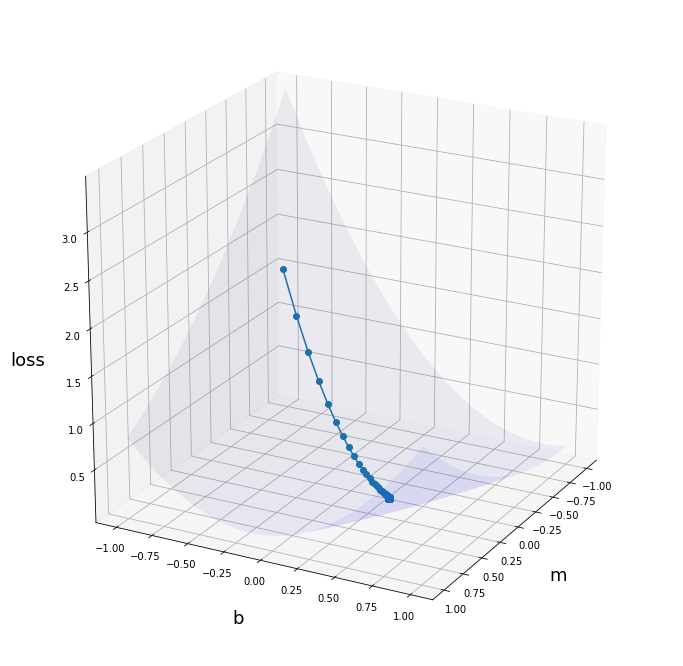

In [17]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# এরর সারফেস প্লট করার জন্য আমাদের লস পেতে হবে 
# m এবং b এর বিভিন্ন সময়ের ভ্যালুগুলোর জন্য

ms = np.linspace(-1, 1)
bs = np.linspace(-1, 1)
m_mesh, b_mesh = np.meshgrid(ms, bs)

def loss_for_values(m, b):
  y = m * x_train + b
  loss = squared_error(y, y_train)
  return loss

zs = np.array([loss_for_values(m, b) for (m,b) in zip(np.ravel(m_mesh), 
                                                      np.ravel(b_mesh))])
z_mesh = zs.reshape(m_mesh.shape)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(m_mesh, b_mesh, z_mesh, color='b', alpha=0.06)

# এরর সারফেস পেয়ে গিয়েছি আমরা 
# আমাদের দরকার history, গ্রেডিয়েন্ট ডিসেন্ট এর স্টেপগুলোর জন্য 

# মডেলকে আবার ট্রেইন করি যাতে আমরা m, b, 
# এবং লসকে ট্র্যাক পারি প্রতিটা স্টেপে

# প্লট যাতে দেখতে সুন্দর হয় সেজন্য আমরা শুরু করছি আমাদের ভ্যালু দিয়ে

m = tf.Variable(-.5)
b = tf.Variable(-.75)

history = []

for i in range(steps):
  with tf.GradientTape() as tape:
    predictions = predict(x_train)
    loss = squared_error(predictions, y_train)
  gradients = tape.gradient(loss, [m, b])
  history.append((m.numpy(), b.numpy(), loss.numpy()))
  m.assign_sub(gradients[0] * learning_rate)
  b.assign_sub(gradients[1] * learning_rate)

# ট্রাজেকটরি প্লট করি
ax.plot([h[0] for h in history], 
        [h[1] for h in history], 
        [h[2] for h in history],
        marker='o')

ax.set_xlabel('m', fontsize=18, labelpad=20)
ax.set_ylabel('b', fontsize=18, labelpad=20)
ax.set_zlabel('loss', fontsize=18, labelpad=20)

ax.view_init(elev=22, azim=28)

চিত্র: এরর সারফেস এবং গ্রেডিয়েন্ট ডিসেন্ট এর নিচে নামার স্টেপগুলো



তাহলে কি শিখলাম?

সবকিছুর ভেতরে ‘গ্র্যাডিয়েন্ট টেপ’ এবং তাদের স্টেগুলো একই থাকছে। ১. আমরা প্রেডিকশন করি। ২. সেখান থেকে লস পাই। ৩. ওখান থেকে আমরা পাচ্ছি গ্রেডিয়েন্ট। আমাদের কাজ শুরু হয় এখান থেকে। 